In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

# 1. Load the dataset in Python environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
loan_data = pd.read_csv('/content/drive/MyDrive/Datasets/train_loan.csv')

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.shape

(614, 13)

In [6]:
#check for duplicates
dupli=loan_data.duplicated()
dupli

,0
0,False
1,False
2,False
3,False
4,False
...,...
609,False
610,False
611,False
612,False


In [7]:
#sum of duplicate rows (count)
dupli.sum()

0

In [8]:
# checking for missing values
loan_data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# 2. Perform different preprocessing steps
# **a. Missing value handling**

In [9]:
#Gender, Married, Dependents, Self_Employed = objects= fill with mode
#LoanAmount, Loan_Amount_Term, Credit_History = floatvalue = fill with mean or median



In [ ]:
loan_data['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [10]:
loan_data['Gender']=loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [11]:
loan_data['Married']=loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [12]:
loan_data['Dependents']=loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [13]:
loan_data['Self_Employed']=loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])

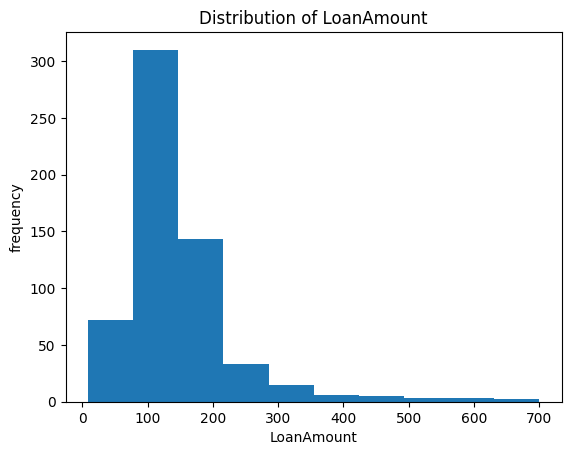

In [14]:
## Fill the missing values in numerical columns, checking data distribution
plt.hist(loan_data['LoanAmount'])
plt.title('Distribution of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('frequency')
plt.show()

In [15]:
loan_data['LoanAmount']=loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

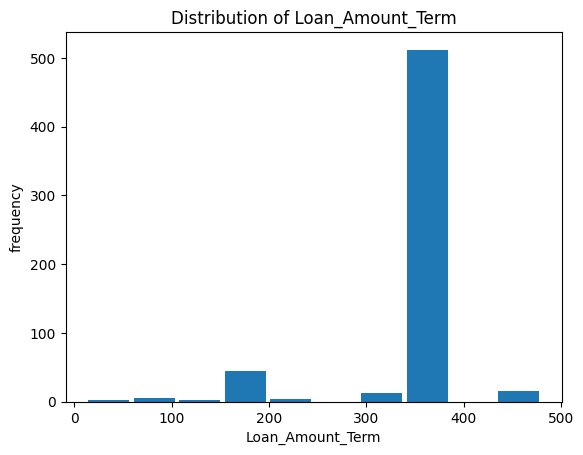

In [16]:
plt.hist(loan_data['Loan_Amount_Term'], rwidth = 0.90)
plt.title('Distribution of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('frequency')
plt.show()

In [17]:
loan_data['Loan_Amount_Term']=loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median())

In [ ]:
loan_data['Credit_History'].median()

1.0

In [ ]:
loan_data['Credit_History']=loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())

In [ ]:
# Again check for missing values
loan_data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# **b**. **Outlier** **detection**

In [18]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


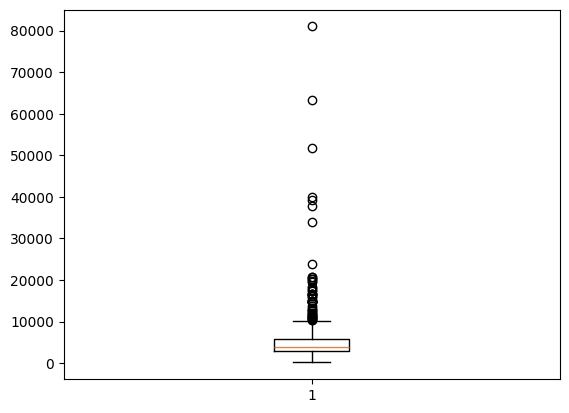

In [19]:
ApplicantIncome = loan_data["ApplicantIncome"]
plt.boxplot(ApplicantIncome)
plt.show()

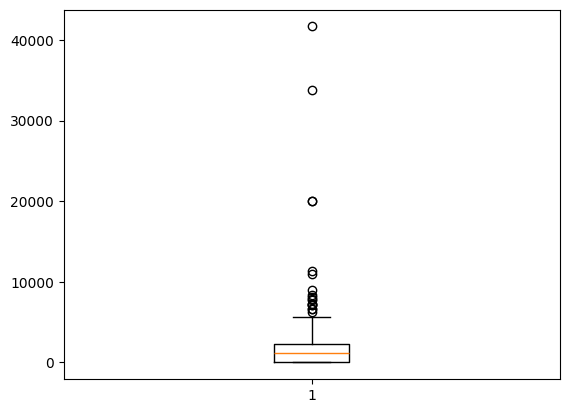

In [20]:
CoapplicantIncome = loan_data["CoapplicantIncome"]
plt.boxplot(CoapplicantIncome)
plt.show()

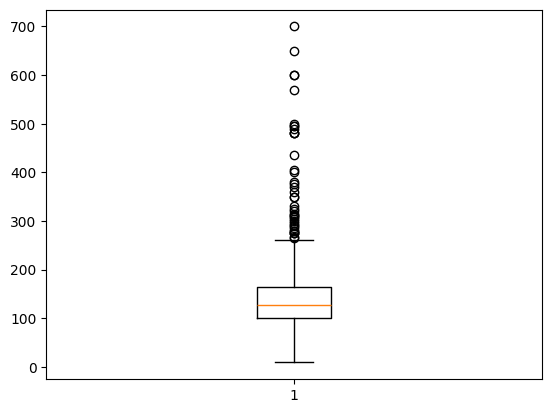

In [21]:
LoanAmount  = loan_data["LoanAmount"]
plt.boxplot(LoanAmount)
plt.show()

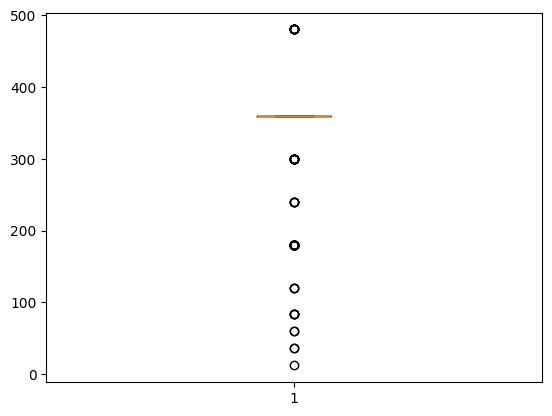

In [22]:
Loan_Amount_Term  = loan_data["Loan_Amount_Term"]
plt.boxplot(Loan_Amount_Term)
plt.show()

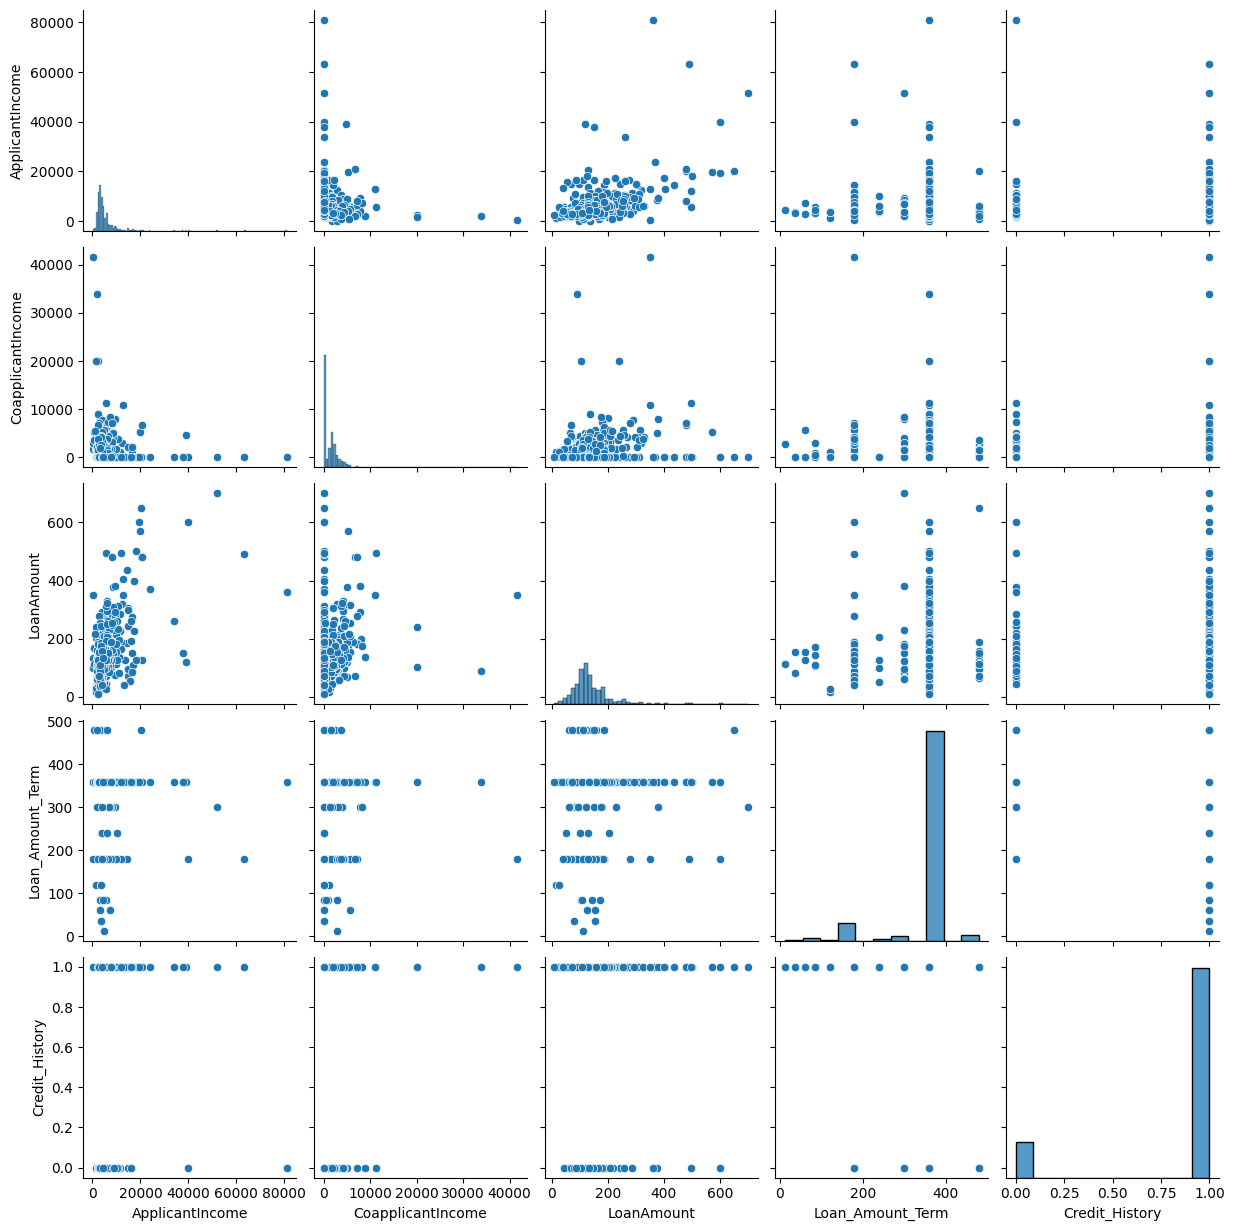

In [ ]:
#pairplot of numerical columns
sns.pairplot(loan_data)
plt.show()

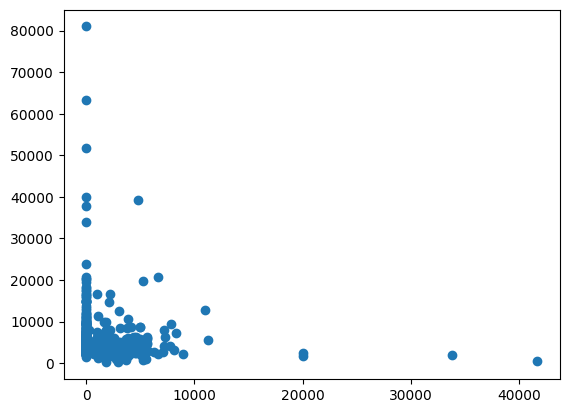

In [23]:
plt.scatter(loan_data['CoapplicantIncome'],loan_data['ApplicantIncome'])
plt.show()

In [24]:
# Outliers are not removed in this case, as it shows more variation

# **c**. **Encoding**

In [ ]:
loan_data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
loan_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#labelencode for the variable Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
loan_data['Gender']= le.fit_transform(loan_data['Gender'])

In [ ]:
loan_data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#labelencode for the variable Married
loan_data['Married']= le.fit_transform(loan_data['Married'])

In [ ]:
loan_data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
dict1 = {'0':0, '1':1, '2':2, '3+':3}
loan_data['Dependents']= loan_data['Dependents'].map(dict1)

In [ ]:
loan_data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
#labelencode for the variableEducation
loan_data['Education']=le.fit_transform(loan_data['Education'])

In [ ]:
loan_data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#labelencode for the variable Self_Employed
loan_data['Self_Employed']=le.fit_transform(loan_data['Self_Employed'])

In [ ]:
loan_data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
#labelencode for the variable Loan_Status
loan_data['Loan_Status']=le.fit_transform(loan_data['Loan_Status'])

In [ ]:
loan_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
#onehot encoding for the variable property area
loan_data= loan_data.drop('Loan_ID', axis=1)


In [ ]:
loan_data=pd.get_dummies(loan_data,dtype=int)

In [ ]:
#loan_data['Property_Area']=le.fit_transform(loan_data['Property_Area'])


In [ ]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Dependents               614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Rural      614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
dtypes: float64(4), int64(10)
m

# d. **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
x= loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

In [ ]:
#scaling done to all numerical colums other than done in encoding
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']


In [ ]:
#all rows of numerical columns
x.loc[:, num_cols]=sc.fit_transform(x[num_cols])


In [ ]:
x.head(11)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,0,0,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,1,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,0,0,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,0,0,1
4,1,0,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,0,0,1
5,1,1,2,0,1,0.002218,0.880600,1.442758,0.273231,1.0,0,0,1
6,1,1,0,1,0,-0.503019,-0.035995,-0.603917,0.273231,1.0,0,0,1
7,1,1,3,0,0,-0.387850,0.301914,0.145737,0.273231,0.0,0,1,0
8,1,1,2,0,0,-0.228939,-0.032575,0.264730,0.273231,1.0,0,0,1
9,1,1,1,0,0,1.218457,3.196713,2.418499,0.273231,1.0,0,1,0
